# Data Overview

## Author: Brady Monks

### Date: 4/23

In [2]:
import pandas as pd

# Read the CSV file into a Pandas dataframe
df = pd.read_csv('athletedatabase.csv')

# Loop over each column in the dataframe
for column in df.columns:
    # Count the number of unique values in the column
    unique_count = df[column].nunique()
    null_count = df[column].isnull().sum()
    
    # Print the column name and unique count
    print(f"{column}: {unique_count} unique values")
    print(f"{column}: {null_count} null values")

FullName: 34310 unique values
FullName: 0 null values
CollegeYear: 148 unique values
CollegeYear: 1162 null values
BirthDay: 21324 unique values
BirthDay: 1162 null values
BirthPlace: 7641 unique values
BirthPlace: 1451 null values
bp_lon: 0 unique values
bp_lon: 37273 null values
bp_lat: 0 unique values
bp_lat: 37273 null values
bp_population: 0 unique values
bp_population: 37273 null values
BirthState: 52 unique values
BirthState: 2623 null values
HighSchool: 11580 unique values
HighSchool: 9359 null values
League: 3 unique values
League: 0 null values
College: 1460 unique values
College: 903 null values
College2: 158 unique values
College2: 36994 null values
College3: 14 unique values
College3: 37258 null values
College4: 1 unique values
College4: 37272 null values
conference_College: 24 unique values
conference_College: 9193 null values
div: 2 unique values
div: 9193 null values
latitude: 249 unique values
latitude: 9193 null values
longitude: 249 unique values
longitude: 9193 null

C:\Users\brady\AppData\Local\Temp\ipykernel_40664\3199463144.py:4: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('athletedatabase.csv')


### Most common occurences in each column

In [9]:
import pandas as pd
#Brady Monks
# Load the dataset into a pandas dataframe
df = pd.read_csv("AthleteDatabase.csv")
# Create an empty dictionary to store the top 10 values for each column
top_10_dict = {}
# Loop through each column in the dataframe
for col in df.columns:
    # Check if the column is categorical
    if df[col].dtype == 'object':
        # Get the value counts for the column
        value_counts = df[col].value_counts()
        # Get the top 10 values and append NaN if there are less than 10 unique values
        top_10 = list(value_counts.index[:10]) + [float('nan')] * (10 - len(value_counts))
        # Add the top 10 values to the dictionary
        top_10_dict[col] = top_10
# Create a new dataframe from the dictionary
top_10_df = pd.DataFrame(top_10_dict)
# Print the new dataframe
top_10_df.head(10)


C:\Users\brady\AppData\Local\Temp\ipykernel_44104\520583948.py:4: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


,FullName,BirthDay,BirthPlace,BirthState,HighSchool,League,College,College2,College3,College4,conference_College,div
0,Mike Williams,9/8/1990,"Chicago, IL",CA,"Long Beach Polytechnic, CA",NFL,University of Notre Dame,Oklahoma State University,Las Vegas,Northwestern Oklahoma State University,Big Ten,fbs
1,Ron Johnson,6/12/1979,"Los Angeles, CA",TX,"South, OH",MLB,University of Southern California,University of Nevada-Las Vegas,Walsh University,NaN,SEC,fcs
2,Kevin Williams,3/14/1964,"Houston, TX",PA,"Abraham Lincoln, CA",NBA,Ohio State University,University of Arizona,Fresno,NaN,Pac-12,NaN
3,Charles Johnson,7/24/1979,"Detroit, MI",OH,"Edison, CA",NaN,University of Michigan,Syracuse University,California State University-Bakersfield,NaN,ACC,NaN
4,Chris Johnson,1/22/1964,"Philadelphia, PA",FL,"McKinley, OH",NaN,University of California-Los Angeles,Iowa State University,University of Houston,NaN,Big 12,NaN
5,Dave Smith,10/4/1960,"Miami, FL",IL,"East, OH",NaN,Louisiana State University,San Diego State University,University of Colorado,NaN,American,NaN
6,Chris Smith,7/14/1970,"Dallas, TX",NY,"Central, MI",NaN,University of Texas,University of Oklahoma,Fullerton,NaN,Mountain West,NaN
7,Chris Jones,1/1/1988,"New York, NY",GA,"Susan Miller Dorsey, CA",NaN,University of Oklahoma,California State University-Fresno,Pepperdine University,NaN,Independent,NaN
8,Mike Smith,2/20/1967,Washington D.C.,LA,"St. Augustine, LA",NaN,University of Alabama,St. John's University,Iowa State University,NaN,MAC,NaN
9,Larry Brown,1/3/1964,"Cleveland, OH",MI,"Central, MN",NaN,University of Florida,University of Houston,Kansas State University,NaN,C-USA,NaN


# Exploratory Data Analysis

## Distribution of Athletes by League

C:\Users\brady\AppData\Local\Temp\ipykernel_65316\2272378089.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


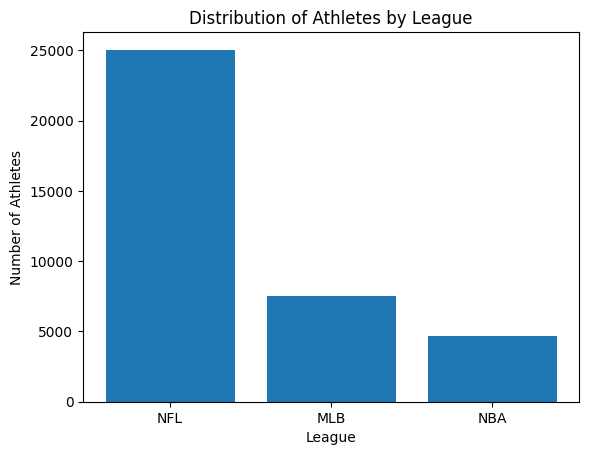

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
df = pd.read_csv("AthleteDatabase.csv")

# Count the number of athletes in each league
league_counts = df['League'].value_counts()

# Create a bar chart of the league counts
plt.bar(league_counts.index, league_counts.values)
plt.title("Distribution of Athletes by League")
plt.xlabel("League")
plt.ylabel("Number of Athletes")
plt.show()

## Distribution of Athletes by College (Top 10)

C:\Users\brady\AppData\Local\Temp\ipykernel_65316\3374706186.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


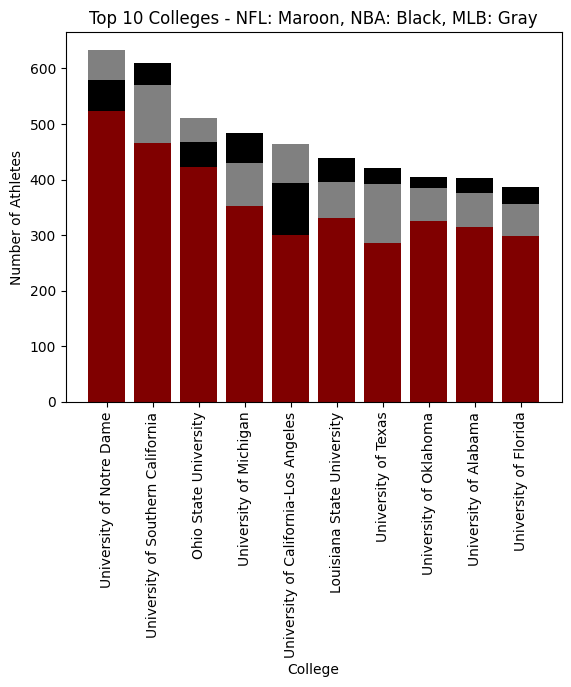

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
df = pd.read_csv("AthleteDatabase.csv")

# Count the number of athletes from each college (excluding "none")
college_counts = df[df['College'] != 'none']['College'].value_counts()[:10]

# Create a dictionary to map leagues to colors
color_dict = {"NFL": "maroon", "NBA": "black", "MLB": "gray"}

# Create a bar chart of the college counts, color coded by league
for i, college in enumerate(college_counts.index):
    college_data = df[df["College"]==college]
    league_counts = college_data["League"].value_counts()
    for j, league in enumerate(league_counts.index):
        plt.bar(college, league_counts[league], bottom=league_counts[:j].sum(), color=color_dict[league])
        
plt.title("Top 10 Colleges - NFL: Maroon, NBA: Black, MLB: Gray")
plt.xlabel("College")
plt.ylabel("Number of Athletes")
plt.xticks(rotation=90)
plt.show()


## Distribution of Athletes by Conference

C:\Users\brady\AppData\Local\Temp\ipykernel_40664\125082744.py:5: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


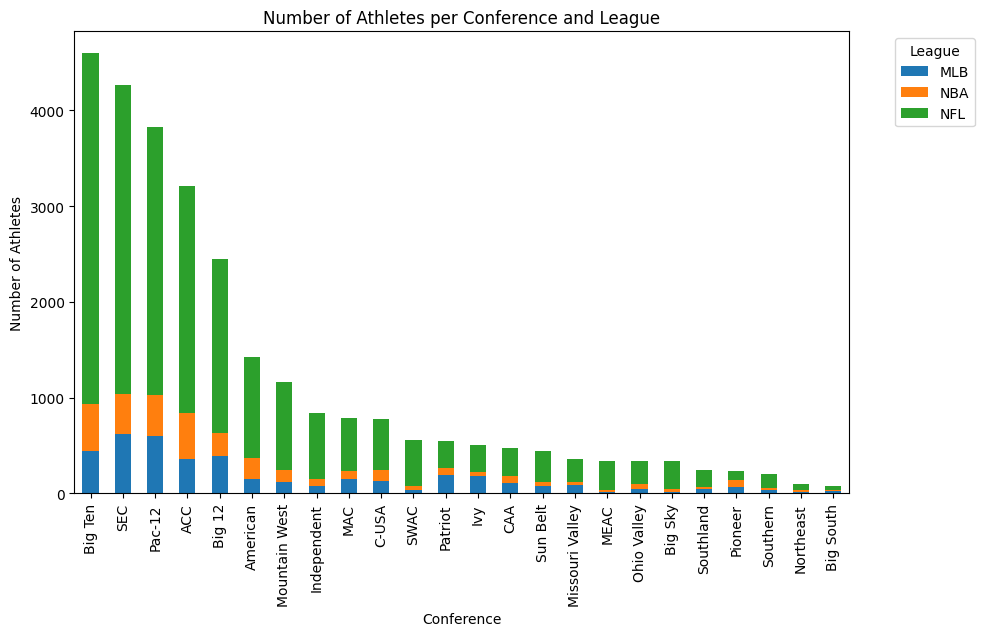

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv("AthleteDatabase.csv")

# Count the number of athletes in each conference and league
counts = df.groupby(["conference_College", "League"]).size().reset_index(name="count")

# Pivot the table to create a matrix of conference counts for each league
pivot_counts = counts.pivot(index="conference_College", columns="League", values="count")

# Sort the values by total count in descending order
total_counts = pivot_counts.sum(axis=1)
sorted_counts = total_counts.sort_values(ascending=False)
sorted_pivot_counts = pivot_counts.loc[sorted_counts.index]

# Create a stacked bar chart of the conference counts
sorted_pivot_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Conference")
plt.ylabel("Number of Athletes")
plt.title("Number of Athletes per Conference and League")
plt.legend(title="League", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=90)
plt.show()


## Distribution of Athletes by States

C:\Users\brady\AppData\Local\Temp\ipykernel_40664\3900501459.py:5: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


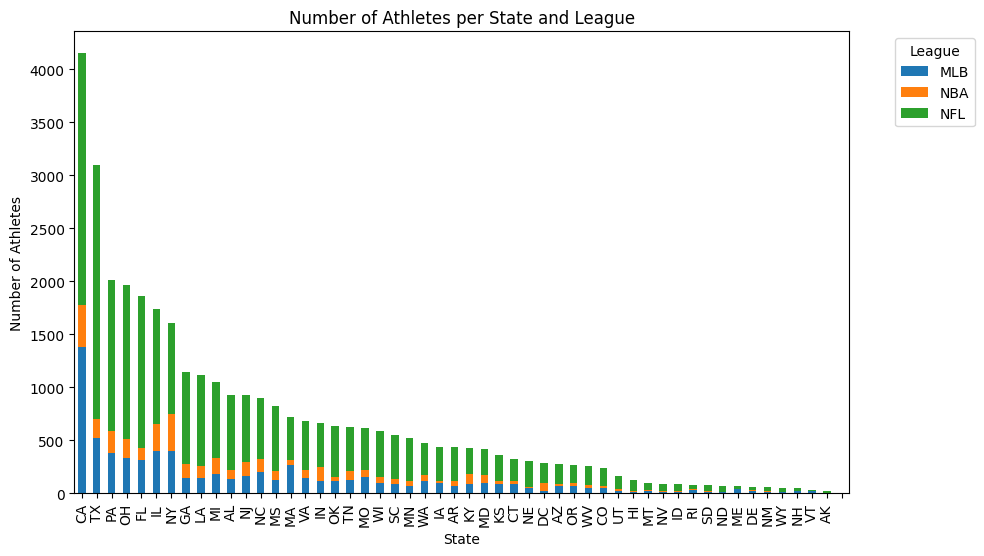

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv("AthleteDatabase.csv")

# Count the number of athletes in each conference and league
counts = df.groupby(["BirthState", "League"]).size().reset_index(name="count")

# Pivot the table to create a matrix of conference counts for each league
pivot_counts = counts.pivot(index="BirthState", columns="League", values="count")

# Sort the values by total count in descending order
total_counts = pivot_counts.sum(axis=1)
sorted_counts = total_counts.sort_values(ascending=False)
sorted_pivot_counts = pivot_counts.loc[sorted_counts.index]

# Create a stacked bar chart of the conference counts
sorted_pivot_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("State")
plt.ylabel("Number of Athletes")
plt.title("Number of Athletes per State and League")
plt.legend(title="League", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=90)
plt.show()


## Breakdown of Athletes over time by Sport

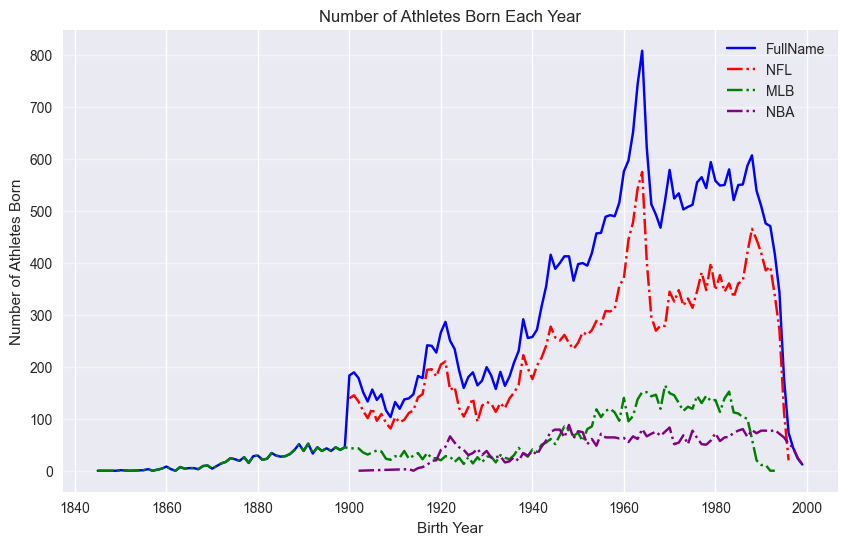

In [29]:
# Set figure size and color scheme
plt.figure(figsize=(10,6))

# Convert "BirthDay" column to datetime format
df["BirthDay"] = pd.to_datetime(df["BirthDay"])

# Create a new column "Year" to extract the year from "BirthDay"
df["Year"] = df["BirthDay"].dt.year

# Group the data by "Year" and count the number of athletes born each year
birth_year_counts = df.groupby("Year")["FullName"].count()

# Plot the line for all sports - blue
birth_year_counts.plot(color="blue")

# Plot the separate lines for each league
nfl = df[df["League"] == "NFL"].groupby("Year")["FullName"].count()
nfl.plot(color="red", linestyle="-.", label="NFL")
mlb = df[df["League"] == "MLB"].groupby("Year")["FullName"].count()
mlb.plot(color="green", linestyle="-.", label="MLB")
mlb = df[df["League"] == "NBA"].groupby("Year")["FullName"].count()
mlb.plot(color="purple", linestyle="-.", label="NBA")

# Set plot title and axis labels
plt.title("Number of Athletes Born Each Year")
plt.xlabel("Birth Year")
plt.ylabel("Number of Athletes Born")

# Add gridlines
plt.grid(axis="y", alpha=0.5)

# Add legend and show the plot
plt.legend()
plt.show()


## Contigency Tables

### Conference X League

In [8]:
import pandas as pd

# load the data
df = pd.read_csv('AthleteDatabase.csv')

# create a contingency table of Conference by League
conf_leag = pd.crosstab(df['conference_College'], df['League'])

# add a new column for the total number of athletes for each college
conf_leag['Total'] = conf_leag.sum(axis=1)

# sort the table by the 'Total' column in descending order
conf_leag_s = conf_leag.sort_values(by='Total', ascending=False)

conf_leag_s.head(24)


C:\Users\brady\AppData\Local\Temp\ipykernel_44104\1628818109.py:4: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AthleteDatabase.csv')


League,MLB,NBA,NFL,Total
conference_College,,,,
Big Ten,444,487,3663,4594
SEC,617,424,3226,4267
Pac-12,595,435,2794,3824
ACC,362,480,2371,3213
Big 12,390,245,1809,2444
American,146,226,1048,1420
Mountain West,119,127,921,1167
Independent,75,78,682,835
MAC,153,79,556,788


### State X League

In [6]:
import pandas as pd

# load the data
df = pd.read_csv('AthleteDatabase.csv')

# create a contingency table of Conference by League
state_leag = pd.crosstab(df['BirthState'], df['League'])

# add a new column for the total number of athletes for each college
state_leag['Total'] = state_leag.sum(axis=1)

# sort the table by the 'Total' column in descending order
state_leag_s = state_leag.sort_values(by='Total', ascending=False)

state_leag_s.head(51)


C:\Users\brady\AppData\Local\Temp\ipykernel_44104\3536237112.py:4: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AthleteDatabase.csv')


League,MLB,NBA,NFL,Total
BirthState,,,,
CA,1381,395,2375,4151
TX,525,176,2394,3095
PA,379,214,1424,2017
OH,334,176,1453,1963
FL,314,111,1441,1866
IL,399,256,1081,1736
NY,398,356,853,1607
GA,149,127,872,1148
LA,142,118,860,1120


## College X League

In [4]:
import pandas as pd

# load the data
df = pd.read_csv('AthleteDatabase.csv')

# create a contingency table of Conference by League
coll_leag = pd.crosstab(df['College'], df['League'])

# add a new column for the total number of athletes for each college
coll_leag['Total'] = coll_leag.sum(axis=1)

# sort the table by the 'Total' column in descending order
coll_leag_s = coll_leag.sort_values(by='Total', ascending=False)

coll_leag_s.head(10)


C:\Users\brady\AppData\Local\Temp\ipykernel_44104\2622198603.py:4: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AthleteDatabase.csv')


League,MLB,NBA,NFL,Total
College,,,,
University of Notre Dame,54,57,523,634
University of Southern California,105,39,465,609
Ohio State University,44,45,422,511
University of Michigan,76,54,353,483
University of California-Los Angeles,70,94,300,464
Louisiana State University,66,42,330,438
University of Texas,107,29,285,421
University of Oklahoma,60,20,325,405
University of Alabama,60,28,315,403


## Interactive Map

In [23]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("AthleteDatabase.csv")

# Group the data by state and count the number of athletes born in each state
state_counts = df.groupby("BirthState")["FullName"].count().reset_index()

# Create a choropleth map using Plotly Express
fig = px.choropleth(
    state_counts,
    locations="BirthState",
    locationmode="USA-states",
    color="FullName",
    scope="usa",
    title="Distribution of Athletes by Birth State",
    labels={"Name": "Number of Athletes Born"}
)

fig.write_html("athlete_map.html")

C:\Users\brady\AppData\Local\Temp\ipykernel_40664\814955688.py:5: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


## Interactive Bar Chart

In [40]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("AthleteDatabase.csv")

# Group the data by birth city and count the number of athletes born in each city
city_counts = df.groupby("BirthPlace")["FullName"].count().reset_index()

# Sort the cities by number of athletes born and select the top 10 cities
top_cities = city_counts.sort_values("FullName", ascending=False).head(10)

# Create a bar chart using Plotly Express
fig = px.bar(
    top_cities,
    x="BirthPlace",
    y="FullName",
    title="Top 10 Cities with the Most Athletes Born",
    labels={"BirthPlace": "City", "Name": "Number of Athletes Born"}
)

fig.write_html("athlete_bar_chart.html")


C:\Users\brady\AppData\Local\Temp\ipykernel_5816\2155797448.py:5: DtypeWarning:

Columns (8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.



## Summary Statistics

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("AthleteDatabase.csv")

# Group the data by league and compute summary statistics for selected columns
summary = df.groupby("League")[["College", "BirthPlace"]].describe()

# Print the summary statistics for each league
summary.head()



C:\Users\brady\AppData\Local\Temp\ipykernel_44104\950484507.py:4: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AthleteDatabase.csv")


College                                       BirthPlace         \
         count unique                       top freq      count unique   
League                                                                   
MLB       7540   1028       University of Texas  107       7541   2584   
NBA       4371    477    University of Kentucky  109       4177   1599   
NFL      24459    797  University of Notre Dame  523      24104   5992   

                              
                    top freq  
League                        
MLB     Los Angeles, CA  152  
NBA         Chicago, IL  137  
NFL         Chicago, IL  474

# Chi-Square Test

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency

# load the csv file into a pandas DataFrame
data = pd.read_csv('AthleteDatabase.csv')

# create a contingency table for each categorical variable and the target variable
cont_table_college = pd.crosstab(data['League'], data['College'])
cont_table_birthplace = pd.crosstab(data['League'], data['BirthPlace'])
cont_table_conference = pd.crosstab(data['League'], data['conference_College'])

# perform chi-square tests for each contingency table
chi2_college, p_college, dof_college, expected_college = chi2_contingency(cont_table_college)
chi2_birthplace, p_birthplace, dof_birthplace, expected_birthplace = chi2_contingency(cont_table_birthplace)
chi2_conference, p_conference, dof_conference, expected_conference = chi2_contingency(cont_table_conference)

# print the results for each chi-square test
print('Chi-square test results for College:')
print('Chi-square statistic:', chi2_college)
print('P-value:', p_college)
print('Degrees of freedom:', dof_college)
print('Expected frequencies:')
print(expected_college)

print('\nChi-square test results for BirthPlace:')
print('Chi-square statistic:', chi2_birthplace)
print('P-value:', p_birthplace)
print('Degrees of freedom:', dof_birthplace)
print('Expected frequencies:')
print(expected_birthplace)

print('\nChi-square test results for Conference:')
print('Chi-square statistic:', chi2_conference)
print('P-value:', p_conference)
print('Degrees of freedom:', dof_conference)
print('Expected frequencies:')
print(expected_conference)


C:\Users\brady\AppData\Local\Temp\ipykernel_5816\1532150789.py:5: DtypeWarning: Columns (8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('AthleteDatabase.csv')


Chi-square test results for College:
Chi-square statistic: 19392.020824927153
P-value: 0.0
Degrees of freedom: 2922
Expected frequencies:
[[6.09452208e+00 2.03150736e-01 1.01575368e+00 ... 2.03150736e+00
  5.68822060e+00 1.83241964e+02]
 [3.75378566e+00 1.25126189e-01 6.25630944e-01 ... 1.25126189e+00
  3.50353329e+00 1.12863822e+02]
 [2.01516923e+01 6.71723075e-01 3.35861538e+00 ... 6.71723075e+00
  1.88082461e+01 6.05894214e+02]]

Chi-square test results for BirthPlace:
Chi-square statistic: 20646.80399758382
P-value: 5.773282090567052e-169
Degrees of freedom: 15284
Expected frequencies:
[[0.42260293 0.63390439 0.21130146 ... 0.21130146 0.21130146 0.21130146]
 [0.23227411 0.34841116 0.11613705 ... 0.11613705 0.11613705 0.11613705]
 [1.34512296 2.01768444 0.67256148 ... 0.67256148 0.67256148 0.67256148]]

Chi-square test results for Conference:
Chi-square statistic: 1122.0219908741176
P-value: 6.309065018658897e-205
Degrees of freedom: 46
Expected frequencies:
[[ 462.8194469   204.545